# Práctica 1. Aprendizaje automático

Adina Han, Diego Ambite 

1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, su distribución y su correlación.

¿¿¿¿¿¿¿¿¿¿¿¿ Corelación, hay valores extremos -> outliers, si están en la misma unidad ??????????

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing

In [2]:
 data_crimes = pd.read_csv('USArrests.csv', index_col = 0)  

In [3]:
data_crimes.keys()

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Tabla con el nombre de las variables

In [4]:
df = pd.DataFrame(data=data_crimes) 
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Tabla de estadísticos descriptivos de cada variable

In [5]:
df.describe()
#std -> standard deviation , a measure of a distribution of the array elements

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Tabla de tipos de las variables

In [6]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

Conclusiones: 

2. Considera si debes re‐escalar las variables antes y el tipo de escalado que usas. Razona tu elección.

In [7]:
#standardize the data to normal distribution

data_crimes_standardized = preprocessing.scale(data_crimes)
print(data_crimes_standardized)
data_crimes_standardized = pd.DataFrame(data_crimes_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

Hemos elegido reescalar las variables del dataset para tener una mayor homogeneidad....

3. Aplica un algoritmo de clustering de los que hemos visto en clase con una parametrización (el valor de k en el algoritmo de k‐medias, o la forma en la que se agrupan clusters en el caso jerárquico).
Determina el número de clusters que consideras adecuado para el conjunto de datos y justifica tu elección.

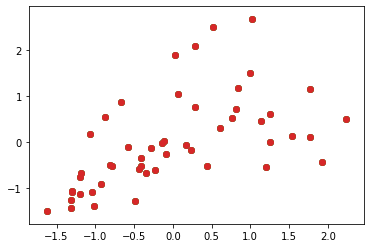

In [8]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[3])

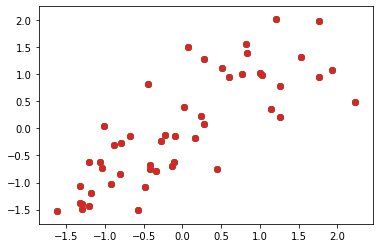

In [9]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[1])

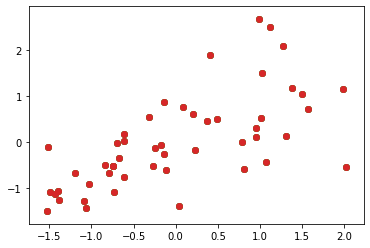

In [10]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[1], data_crimes_standardized[3])

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(data_crimes_standardized)

y_kmeans1

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans.fit_predict(data_crimes_standardized)

y_kmeans2

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
#scatter plots

Este algoritmo funciona pre-seleccionando un valor de K. Para encontrar el número de clusters en los datos, deberemos ejecutar el algoritmo para un rango de valores K, ver los resultados y comparar características de los grupos obtenidos. En general no hay un modo exacto de determinar el valor K, pero se puede estimar con aceptable precisión siguiendo la siguiente técnica:

Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroid. Como el valor de la media diminuirá a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el «punto codo», donde la tasa de descenso se «afila». Aquí vemos una gráfica a modo de ejemplo:

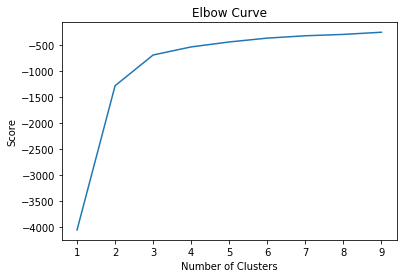

In [45]:

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [32]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [33]:
real_centers = [[1, 1], [5, 5], [7, 3]]
stds = [1, 0.7, 1.7]
X, labels = make_blobs(n_samples = len(df),n_features=4, centers = None, cluster_std = stds, random_state=333)

print('Número de elementos:', len(X))
print('Primeros elementos de X:', X[0:10])
print('Primeras elementos de labels:', labels[0:10])

Número de elementos: 50
Primeros elementos de X: [[-3.67519208  6.43611569 -9.51389955 -8.09448482]
 [-1.44006346 -9.23633446 -8.65596969 -8.74064839]
 [ 1.06191881  3.40093355 -8.21559678 -1.32506094]
 [-0.56733848  1.80684791 -9.26548021 -3.92931666]
 [ 2.69141643  4.73148662 -9.14178626 -4.51484055]
 [-4.62391269 10.26946807 -9.21168951 -8.09976619]
 [-1.86241061 -9.7542423  -8.08917255 -6.59731837]
 [ 0.8138414   5.27304187 -9.78596884 -1.61960685]
 [-1.83715319 -8.83910108 -8.13756103 -7.87679003]
 [-2.25933546 -9.54686997 -8.7548482  -7.65302683]]
Primeras elementos de labels: [2 1 0 0 0 2 1 0 1 1]


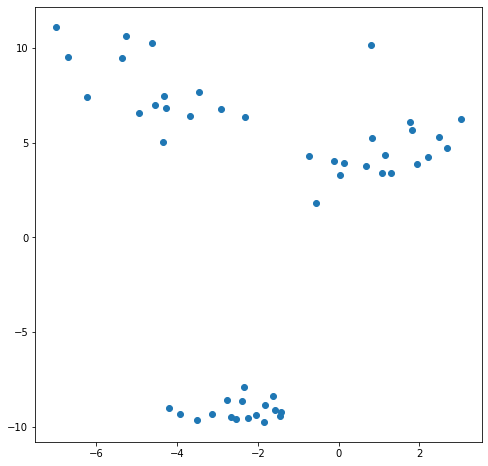

In [34]:
plot_clusters(X)

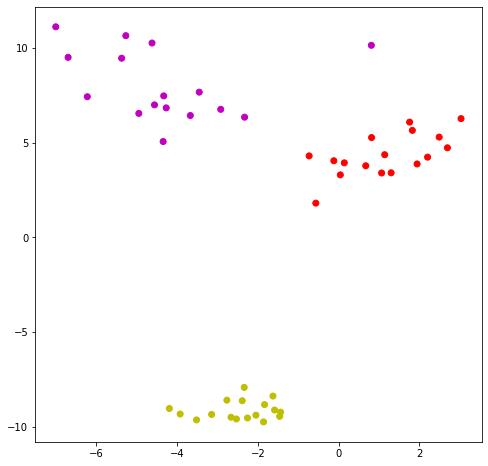

In [35]:
plot_clusters(X, labels)

In [36]:
real_centers = [[1, 1], [5, 5], [7, 3]]
stds = [1, 0.7, 1.7]
X, labels = make_blobs(n_samples = len(df),n_features=4, centers = None, cluster_std = stds, random_state=333)

print('Número de elementos:', len(X))
print('Primeros elementos de X:', X[0:10])
print('Primeras elementos de labels:', labels[0:10])

Número de elementos: 50
Primeros elementos de X: [[-3.67519208  6.43611569 -9.51389955 -8.09448482]
 [-1.44006346 -9.23633446 -8.65596969 -8.74064839]
 [ 1.06191881  3.40093355 -8.21559678 -1.32506094]
 [-0.56733848  1.80684791 -9.26548021 -3.92931666]
 [ 2.69141643  4.73148662 -9.14178626 -4.51484055]
 [-4.62391269 10.26946807 -9.21168951 -8.09976619]
 [-1.86241061 -9.7542423  -8.08917255 -6.59731837]
 [ 0.8138414   5.27304187 -9.78596884 -1.61960685]
 [-1.83715319 -8.83910108 -8.13756103 -7.87679003]
 [-2.25933546 -9.54686997 -8.7548482  -7.65302683]]
Primeras elementos de labels: [2 1 0 0 0 2 1 0 1 1]


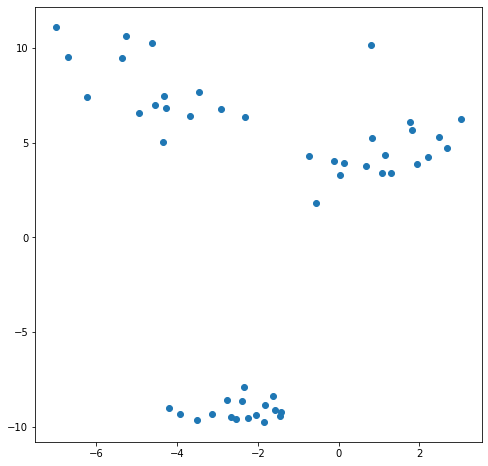

In [37]:
plot_clusters(X)

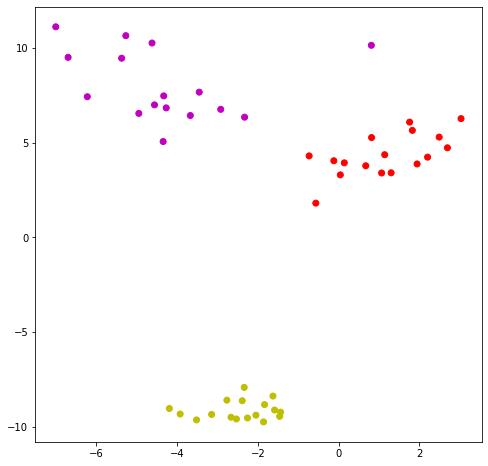

In [38]:
plot_clusters(X, labels)

In [50]:
real_centers = [[1, 1], [3, 3], [5, 5]]
stds = [1, 1.5, 2.7]
X, labels = make_blobs(n_samples = len(df),n_features=4, centers = None, cluster_std = stds, random_state=333)

print('Número de elementos:', len(X))
print('Primeros elementos de X:', X[0:10])
print('Primeras elementos de labels:', labels[0:10])

Número de elementos: 50
Primeros elementos de X: [[ -2.84181465   5.82807369  -9.83515386  -7.68513866]
 [ -0.08520626  -9.46765763  -9.5091965   -9.52853262]
 [  1.06191881   3.40093355  -8.21559678  -1.32506094]
 [ -0.56733848   1.80684791  -9.26548021  -3.92931666]
 [  2.69141643   4.73148662  -9.14178626  -4.51484055]
 [ -4.3486062   11.91633923  -9.35517321  -7.69352672]
 [ -0.99023588 -10.57746014  -8.2946312   -4.93568257]
 [  0.8138414    5.27304187  -9.78596884  -1.61960685]
 [ -0.93611284  -8.61644325  -8.39832079  -7.67740756]
 [ -1.84078913 -10.13309087  -9.72107901  -7.19791499]]
Primeras elementos de labels: [2 1 0 0 0 2 1 0 1 1]


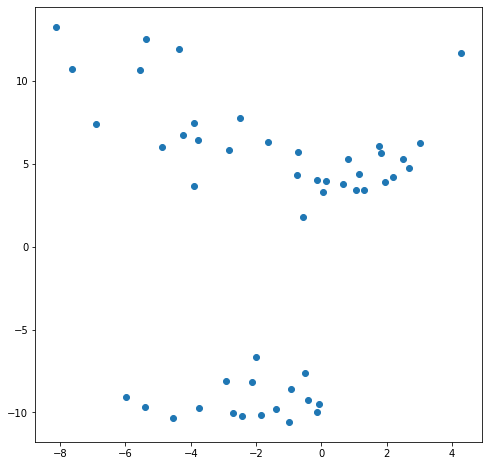

In [51]:
plot_clusters(X)

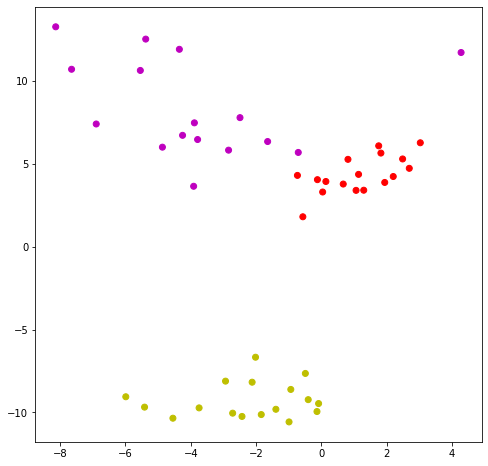

In [52]:
plot_clusters(X, labels)

4. Da un sentido a cada uno de los clusters que has obtenido en el contexto del problema que representa el conjunto de datos. Si obtienes un número mayor de 4 clusters, comenta solamente los dos los dos más numerosos y los dos menos numerosos. Para analizar los clusters:


Usa estadísticos descriptivos (número de individuos, media, desviación típica, mediana,
 cuartiles) para describir los clusters.

## Describiendo los clusters

centroídes = el valor que toman las variables en el individuo prototípico de cada cluster.

In [53]:

km = KMeans(init='random', n_clusters=3, random_state=333)
km.fit(X)


centers = km.cluster_centers_
centers

array([[ 1.05302098,  4.41548355, -9.67228789, -3.83274297],
       [-2.24626669, -9.26653747, -8.03464738, -8.04025597],
       [-4.09066163,  8.56677768, -8.63542848, -9.1000859 ]])

In [55]:
df = pd.DataFrame(data=X, columns=['x','y', 'z', 'w'])
df = df.assign(cluster=pd.Series(data=km.labels_))
df

,x,y,z,w,cluster
0,-2.841815,5.828074,-9.835154,-7.685139,2
1,-0.085206,-9.467658,-9.509197,-9.528533,1
2,1.061919,3.400934,-8.215597,-1.325061,0
3,-0.567338,1.806848,-9.265480,-3.929317,0
4,2.691416,4.731487,-9.141786,-4.514841,0
5,-4.348606,11.916339,-9.355173,-7.693527,2
6,-0.990236,-10.577460,-8.294631,-4.935683,1
7,0.813841,5.273042,-9.785969,-1.619607,0
8,-0.936113,-8.616443,-8.398321,-7.677408,1
9,-1.840789,-10.133091,-9.721079,-7.197915,1


In [56]:
df.groupby(["cluster"]).describe()

x                                                              \
        count      mean       std       min       25%       50%       75%   
cluster                                                                     
0        18.0  1.053021  1.194807 -0.733350  0.063662  1.100217  1.910652   
1        17.0 -2.246267  1.805770 -5.988991 -2.934962 -2.015894 -0.936113   
2        15.0 -4.090662  2.947631 -8.134966 -5.461313 -4.250749 -3.316113   

                      y            ...         z               w            \
              max count      mean  ...       75%       max count      mean   
cluster                            ...                                       
0        3.028889  18.0  4.415484  ... -9.172710 -6.611341  18.0 -3.832743   
1       -0.085206  17.0 -9.266537  ... -7.454211 -6.192190  17.0 -8.040256   
2        4.278018  15.0  8.566778  ... -6.878797 -2.317793  15.0 -9.100086   

                                                                       
              std        min        25%       50%       75%       max  
cluster                                                                
0        1.207844  -6.050599  -4.490059 -3.866899 -3.253491 -1.325061  
1        1.863595 -11.875573  -9.276555 -7.802006 -7.197915 -4.139496  
2        2.475207 -15.216768 -10.595639 -8.143840 -7.491890 -5.827236  

[3 rows x 32 columns]

Usa una matriz de gráficos de dispersión que pinte los clusters usando un color diferente para ver la separación de los clusters en función de cada par de variables de entrada. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se cofunden más? Para ello, usa la función seaborn.pair_plot de la librería de representación gráfica seaborn, como puedes ver en este ejemplo